# **Projeto pandas do bootcamp DIO**

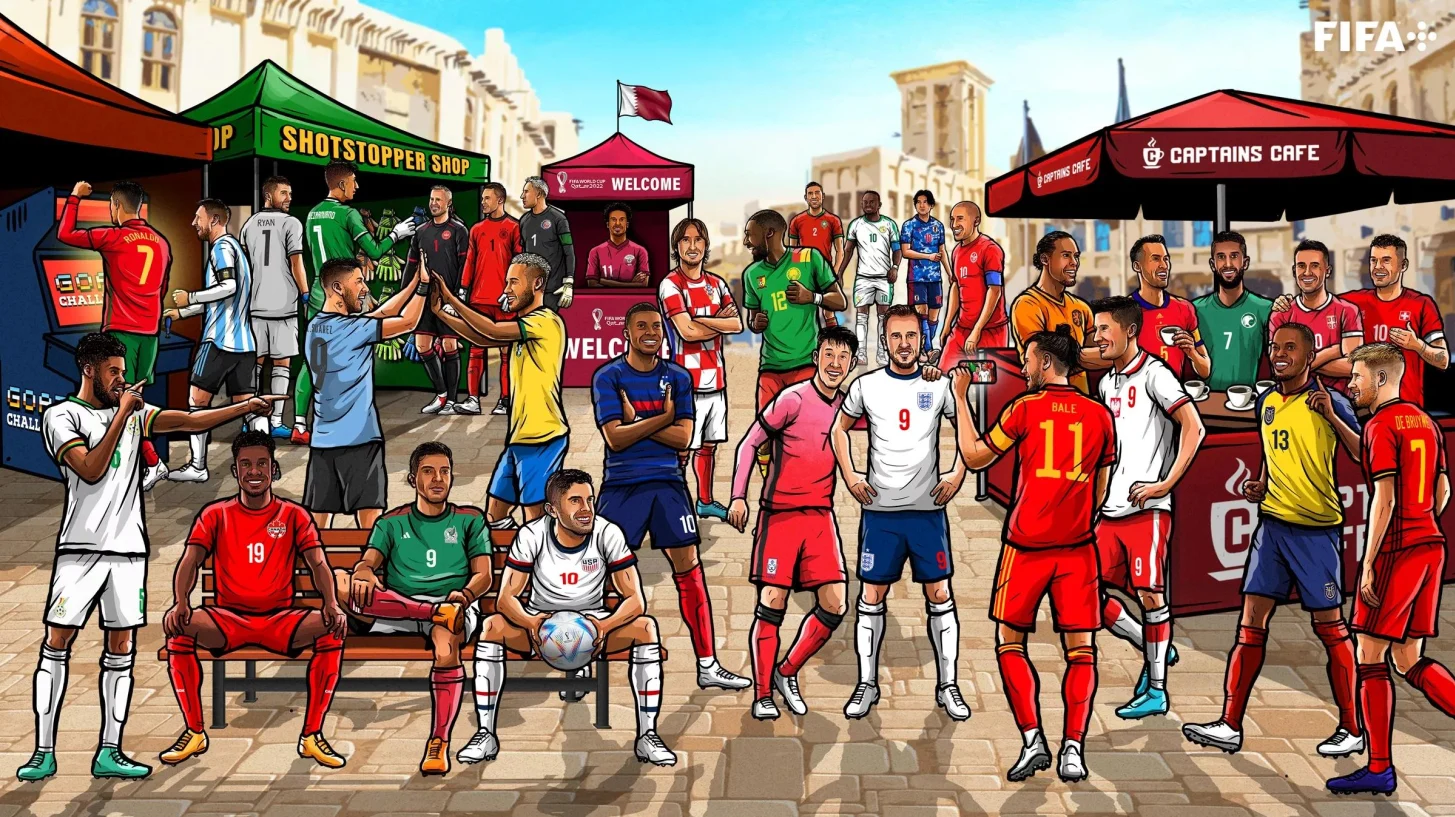


## A Copa do mundo de 2022, que será realizada no Qatar, está próxima de 



acontecer. Uma maneira de visualizar como as seleções chegam para a disputa do torneio, é a realização de uma Análise Descritiva do desempenho destas em jogos internacionais. Assim, o data frame aqui utilizado contém partidas disputadas por seleções desde 1993, mas para essa análise apenas os jogos realizados em 2022 serão considerados. Nas colunas do data frame, encontramos informações como o ranking dos times dado pela FIFA, a média de força ofensiva, defensiva e de outros atributos dessas seleções. 

##**1. Preparando os dados**

### 1.1 Bibliotecas utilizadas

In [ ]:
#!pip install matplotlib==3.5.2

Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, packaging, fonttools, pyparsing, cycler, python-dateutil, pillow, kiwisolver
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [ ]:

# Bibliotecas usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Importando o dataset utilizado

In [ ]:
matches = pd.read_csv('/content/drive/MyDrive/Machine Learning/international_matches.csv')

In [ ]:
matches.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 Filtrando

In [ ]:
#filtrando apenas jogos em 2022
matches = matches[matches['date'] > '2022-01-01']
matches.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23350,2022-01-02,Gabon,Burkina Faso,Africa,Africa,89,60,1262,1397,0,...,No,Lose,NaN,73.0,68.8,NaN,74.0,69.5,71.7,67.0
23351,2022-01-02,Sudan,Zimbabwe,Africa,Africa,125,121,1131,1138,0,...,No,Draw,NaN,NaN,NaN,62.3,NaN,65.0,72.3,NaN
23352,2022-01-03,Rwanda,Guinea,Africa,Africa,135,81,1095,1298,3,...,No,Win,NaN,69.0,NaN,NaN,NaN,70.5,73.3,75.0
23353,2022-01-04,Mauritania,Gabon,Africa,Africa,103,89,1190,1262,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,68.8,NaN,74.0
23354,2022-01-05,Algeria,Ghana,Africa,Africa,29,52,1516,1428,3,...,No,Win,78.0,74.0,78.0,81.0,78.0,75.5,76.0,78.2


In [ ]:
#Filtrando apenas os times que estão na Copa do Mundo.
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
matches = matches[matches['home_team'].isin(teams_worldcup)]                  

In [ ]:
#Colunas que iremos usar
matches.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
# df com as colunas a serem usados
df = matches[['date','away_team','home_team', 'home_team_total_fifa_points','away_team_total_fifa_points', 'home_team_goalkeeper_score',
              'away_team_goalkeeper_score','home_team_mean_defense_score','away_team_mean_defense_score','home_team_mean_offense_score',
              'away_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_midfield_score']]


## **2- Análise Exploratória**

Vamos utilizar a média de cada medida ao longo do ano para cada time, e faremos uma ADE a partir dela.

#### 2.1 Primeiro, quais as 10 seleções com melhor pontuação no Ranking da FIFA em 2022?


In [ ]:
fifa_rank = df.groupby('home_team').home_team_total_fifa_points.mean().sort_values(ascending = False)
fifa_rank = pd.DataFrame({'team':fifa_rank.index,'fifa_points':fifa_rank.values})

Text(0, 0.5, 'Seleção')

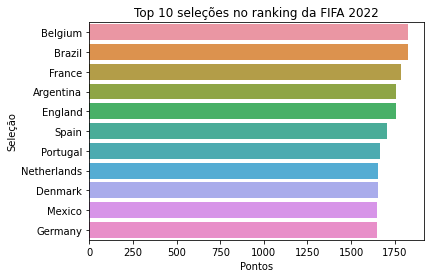

In [ ]:
#plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=fifa_rank[0:11],y='team',x='fifa_points')
plt.title("Top 10 seleções no ranking da FIFA 2022")
plt.xlabel('Pontos')
plt.ylabel('Seleção')

### 2.2  Vamos olhar agora o top 10 de seleções com a melhor defesa, meio-campo e ataque.

**Top 10 defesas**

In [ ]:
defesa_rank = df.groupby('home_team').home_team_mean_defense_score.mean().sort_values(ascending = False)
defesa_rank = pd.DataFrame({'team':defesa_rank.index, 'mean_defense':defesa_rank.values})

(0.0, 90.0)

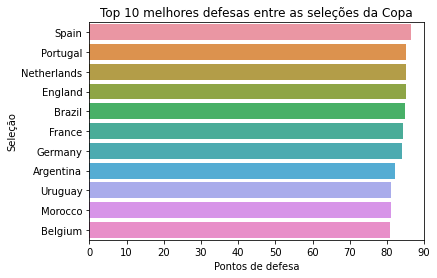

In [ ]:
#plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=defesa_rank[0:11], y='team', x='mean_defense')
plt.title('Top 10 melhores defesas entre as seleções da Copa')
plt.xlabel('Pontos de defesa')
plt.ylabel('Seleção')
plt.xlim(0,90)


**Top 10 meio-campos**

In [ ]:
# meiocampo
meio_rank = df.groupby('home_team').home_team_mean_midfield_score.mean().sort_values(ascending = False)
meio_rank = pd.DataFrame({'team':meio_rank.index, 'mean_midfield':meio_rank.values})

(0.0, 90.0)

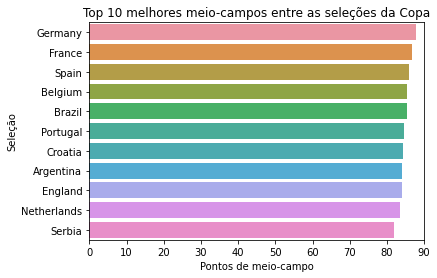

In [ ]:
#plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=meio_rank[0:11], y='team', x='mean_midfield')
plt.title('Top 10 melhores meio-campos entre as seleções da Copa')
plt.xlabel('Pontos de meio-campo')
plt.ylabel('Seleção')
plt.xlim(0,90)

**Top 10 ataques**

In [ ]:
ataque_rank = df.groupby('home_team').home_team_mean_offense_score.mean().sort_values(ascending = False)
ataque_rank = pd.DataFrame({'team':ataque_rank.index, 'mean_offense':ataque_rank.values})

(0.0, 90.0)

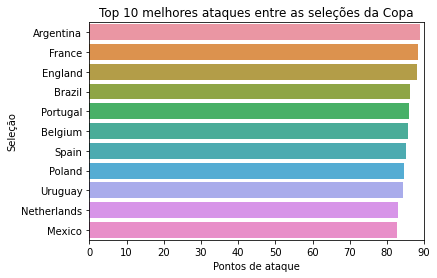

In [ ]:
#plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=ataque_rank[0:11], y='team', x='mean_offense')
plt.title('Top 10 melhores ataques entre as seleções da Copa')
plt.xlabel('Pontos de ataque')
plt.ylabel('Seleção')
plt.xlim(0,90)

### 2.3 Box plot dos 3 atributos

In [ ]:
#juntando os 3 dfs
df_merged = pd.merge(pd.merge(ataque_rank,defesa_rank,on='team'),meio_rank,on='team')
df_merged.head()

,team,mean_offense,mean_defense,mean_midfield
0,Argentina,89.0,82.2,84.0
1,France,88.3,84.2,86.8
2,England,88.0,85.0,84.0
3,Brazil,86.3,84.8,85.5
4,Portugal,86.0,85.2,84.5


Text(0, 0.5, 'Pontos')

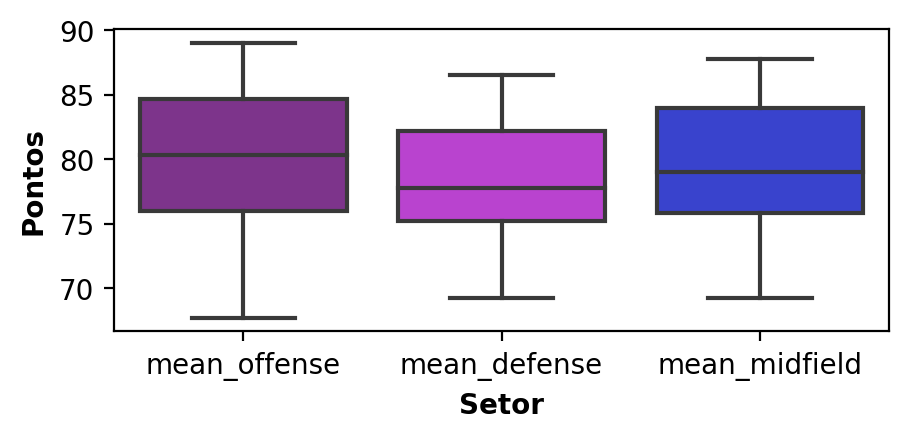

In [ ]:
plt.figure(figsize=(5,2), dpi=200)
sns.boxplot(data=df_merged, palette=['#872599', '#C92CE6', '#202DE6'])
plt.xlabel('Setor', fontsize = '10', weight = 'bold')
plt.ylabel('Pontos', fontsize = '10', weight = 'bold')

Temos no boxplot acima os 3 dos atributos presentes no dataframe. Vemos que para o ataque (mean_offense) a caixa possui simetria, ou seja, o ataque das seleções está bem distribuído em torno da mediana. Nos outros dois atributos, vemos uma assimetria positiva, indicando que a maior parte dos valores estão acima da mediana.

### 2.4 Misturando os 3 atributos

In [ ]:
df_merged['mix_scores'] = round(((df_merged['mean_defense'] + df_merged['mean_offense'] + df_merged['mean_midfield'])/3),1)
df_merged.head()

,team,mean_offense,mean_defense,mean_midfield,mix_scores
0,Argentina,89.0,82.2,84.0,85.1
1,France,88.3,84.2,86.8,86.4
2,England,88.0,85.0,84.0,85.7
3,Brazil,86.3,84.8,85.5,85.5
4,Portugal,86.0,85.2,84.5,85.2


(0.0, 90.0)

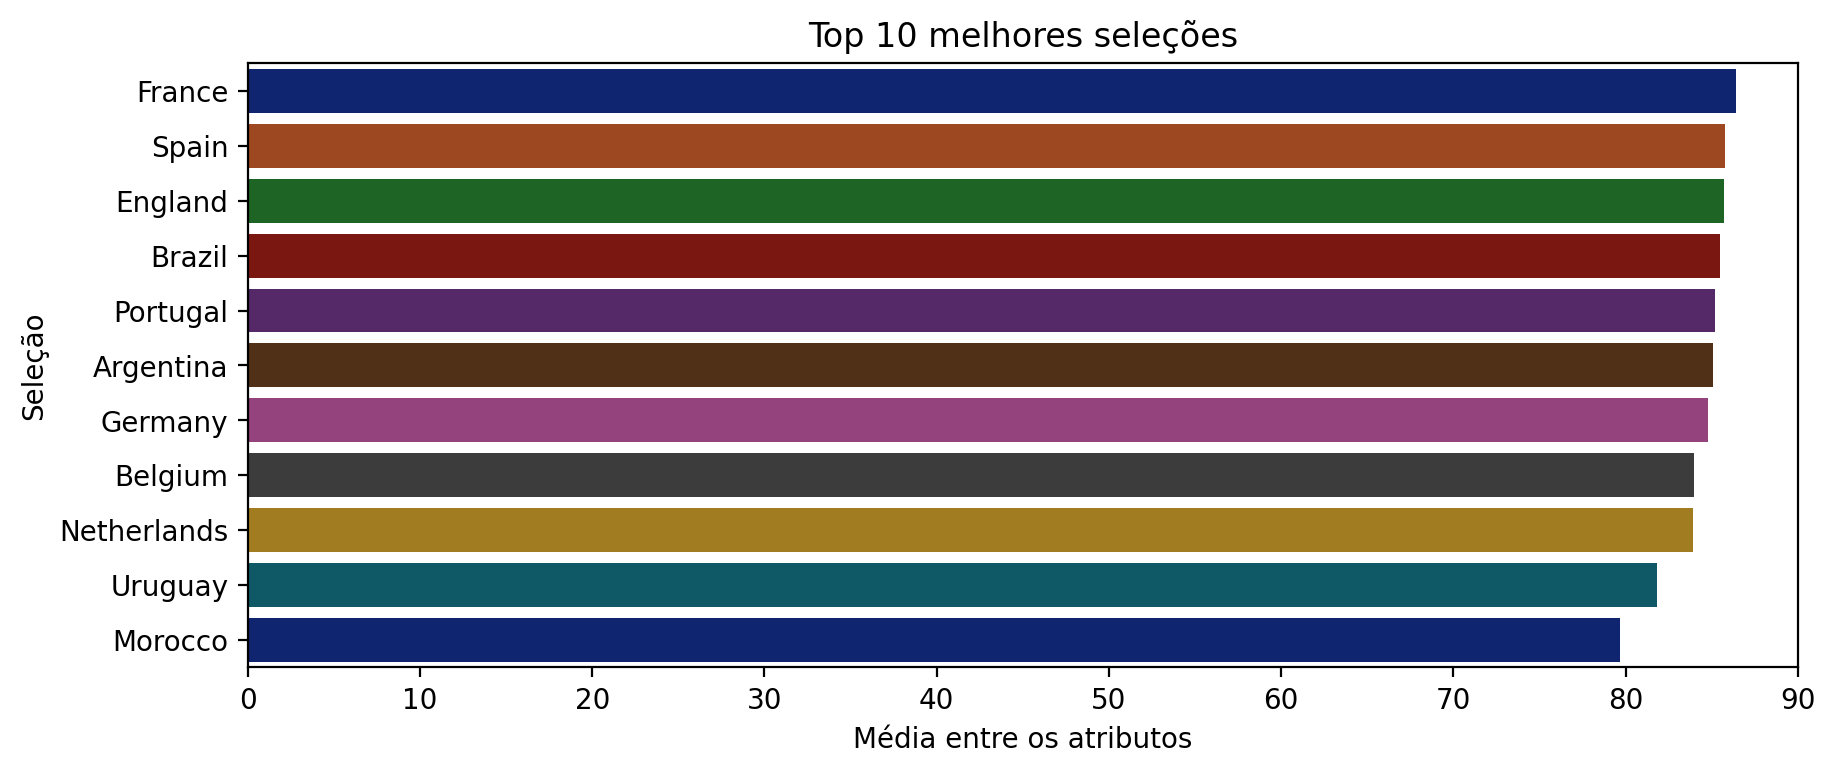

In [ ]:
sns.set_palette("dark")
plt.figure(figsize=(10,4), dpi=200)
g1=sns.barplot(data=df_merged.sort_values(['mix_scores'],ascending=False)[0:11], y='team', x='mix_scores', palette='dark')
#g1.bar_label(g1.containers[0])
plt.title('Top 10 melhores seleções')
plt.xlabel('Média entre os atributos')
plt.ylabel('Seleção')
plt.xlim(0,90)